In [1]:
# <!-- collapse=True -->
%matplotlib inline
from datetime import datetime
from IPython.display import Markdown
from os.path import join
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Use modified seaborn-darkgrid style with bigger text
plt.style.use('../big-darkgrid.mplstyle')

Let's load and examine the ratings data. I sort the data by `timestamp` and break the `timestamp` column out into `year`, `month`, `day`, `hour`, and `minute` just for good measure. I save that preprocessed data to a [feather file format](https://blog.rstudio.com/2016/03/29/feather/) for faster loading later on.

In [2]:
# <!-- collapse=True -->
ratings_feather = '../preprocessed/ratings.feather'
ratings_csv = '../raw/ratings.csv'
if exists(ratings_feather):
    # Reading in feather file saves time
    ratings_df = pd.read_feather(ratings_feather)
else:
    ratings_df = pd.read_csv('../raw/ratings.csv')
    ratings_df = ratings_df.sort_values('timestamp').reset_index(drop=True)
    ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
    ratings_df['year'] = ratings_df['timestamp'].dt.year
    ratings_df['month'] = ratings_df['timestamp'].dt.month
    ratings_df['day'] = ratings_df['timestamp'].dt.day
    ratings_df['hour'] = ratings_df['timestamp'].dt.hour
    ratings_df['minute'] = ratings_df['timestamp'].dt.minute
    # Save to feather file for faster loading later
    ratings_df.to_feather(ratings_feather)
ratings_df.head()

,userId,movieId,rating,timestamp,year,month,day,hour,minute
0,28507,1176,4.0,1995-01-09 06:46:44,1995,1,9,6,46
1,131160,1079,3.0,1995-01-09 06:46:49,1995,1,9,6,46
2,131160,47,5.0,1995-01-09 06:46:49,1995,1,9,6,46
3,131160,21,3.0,1995-01-09 06:46:49,1995,1,9,6,46
4,85252,45,3.0,1996-01-28 19:00:00,1996,1,28,19,0


This part of the dataset is quite simple in principle: just user-movie-rating triplets at different points in time. Let's ask some questions about the data to get a feel for what we're working with:

# 1. What is the distribution of the ratings?

I'd like to see what ratings are common and uncommon, so let's just plot counts of each rating:

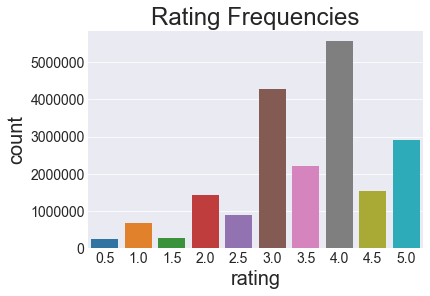

In [3]:
# <!-- collapse=True -->
ax = sns.countplot(x='rating', data=ratings_df)
ax.set_title('Rating Frequencies')
plt.show()

That's odd...why are the half-star scores less popular? Do people prefer whole numbers? Let's look at how this distribution changes over time to see if this behavior is consistent.

# 2. How does the ratings distribution change over time?

I think a heatmap with time on the x-axis and rating on the y-axis would be a good way to visualize this. To do this with [seaborn](https://seaborn.pydata.org/) we first need to pivot the data into a table that resembles this structure:

In [4]:
# <!-- collapse=True -->
ratings_pivot = pd.pivot_table(ratings_df, values='timestamp', index='rating', columns='year', aggfunc='count')
ratings_pivot = ratings_pivot.apply(lambda x: x/np.sum(x), axis=0)
ratings_pivot = ratings_pivot.sort_index(ascending=False)
ratings_pivot

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
rating,,,,,,,,,,,,,,,,,,,,,
5.0,0.25,0.194349,0.209970,0.210618,0.239812,0.225695,0.209403,0.191601,0.125151,0.080522,...,0.090092,0.093928,0.098325,0.098741,0.103546,0.107707,0.117445,0.127080,0.128290,0.120103
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086102,0.122155,...,0.122352,0.125240,0.135530,0.129154,0.134147,0.136572,0.145237,0.146889,0.138722,0.112482
4.0,0.25,0.294294,0.307278,0.333464,0.350266,0.348297,0.346210,0.344366,0.270211,0.234167,...,0.236409,0.234010,0.247501,0.241068,0.242959,0.245104,0.250789,0.252896,0.248897,0.241003
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123154,0.190191,...,0.188709,0.184744,0.189570,0.186827,0.185955,0.187727,0.179958,0.180144,0.176112,0.175171
3.0,0.50,0.412133,0.381724,0.277416,0.250918,0.260374,0.272061,0.278810,0.198379,0.159362,...,0.156911,0.155823,0.148173,0.153384,0.149393,0.147626,0.142277,0.140413,0.141774,0.156554
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051787,0.081373,...,0.078797,0.080037,0.071611,0.073831,0.071830,0.070096,0.065811,0.059509,0.062693,0.068185
2.0,NaN,0.060849,0.063432,0.114747,0.104355,0.107804,0.113312,0.125137,0.079408,0.059286,...,0.058521,0.058534,0.049215,0.052040,0.049416,0.047372,0.045452,0.042507,0.045637,0.052493
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016082,0.026417,...,0.025811,0.026319,0.022101,0.024350,0.021866,0.020768,0.018350,0.017281,0.018469,0.021380
1.0,NaN,0.038375,0.037596,0.063756,0.054649,0.057829,0.059014,0.060087,0.035519,0.023709,...,0.022842,0.022158,0.019328,0.020095,0.019213,0.018544,0.017414,0.017316,0.018914,0.024526


And now we're set to visualize this:

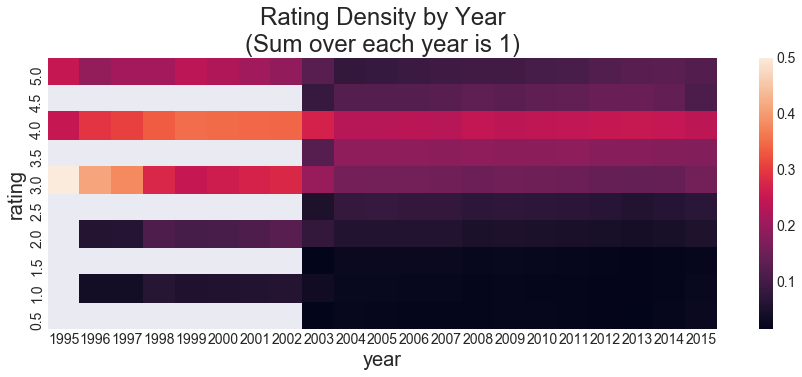

In [5]:
# <!-- collapse=True -->
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(ratings_pivot, ax=ax)
ax.set_title('Rating Density by Year\n(Sum over each year is 1)')
plt.show()

Ahh, this explains the rating distribution. It looks like half-stars weren't allowed until part-way through 2003. After 2003 the distribution looks pretty smooth and consistent. This leads me to my next question:

# 3. How do the ratings distributions compare before and after half scores are allowed?

If we find the timestamp of the very first half-star rating, we can look at the distributions before and after that timestamp. Here, we can see it was a 3.5 star rating on February 18th, 2003, for Catch Me If You Can (go to [https://movielens.org/movies/5989](https://movielens.org/movies/5989) to see the title of `movieId` 5989).

In [6]:
switch_timestamp = ratings_df[ratings_df['rating'].isin([0.5, 1.5, 2.5, 3.5, 4.5])].iloc[0]['timestamp']
ratings_df[ratings_df['timestamp'] == switch_timestamp]

,userId,movieId,rating,timestamp,year,month,day,hour,minute
8002000,61394,5989,3.5,2003-02-18 16:34:27,2003,2,18,16,34


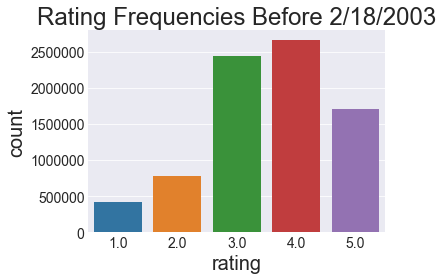

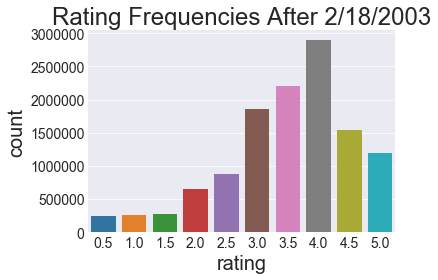

In [7]:
# <!-- collapse=True -->
sns.countplot(x='rating', data=ratings_df[ratings_df['timestamp']<switch_timestamp])
plt.title('Rating Frequencies Before 2/18/2003')
plt.tight_layout()
plt.show()
sns.countplot(x='rating', data=ratings_df[ratings_df['timestamp']>=switch_timestamp])
plt.title('Rating Frequencies After 2/18/2003')
plt.tight_layout()
plt.show()

# 4. How many ratings were submitted per year?

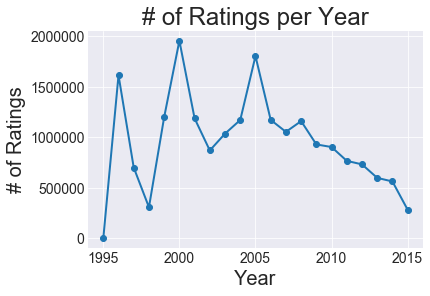

Here are the 4 ratings from 1995:

,userId,movieId,rating,timestamp,year,month,day,hour,minute
0,28507,1176,4.0,1995-01-09 06:46:44,1995,1,9,6,46
1,131160,1079,3.0,1995-01-09 06:46:49,1995,1,9,6,46
2,131160,47,5.0,1995-01-09 06:46:49,1995,1,9,6,46
3,131160,21,3.0,1995-01-09 06:46:49,1995,1,9,6,46


In [8]:
# <!-- collapse=True -->
year_counts = ratings_df['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts, 'o-')
plt.xlabel('Year')
plt.ylabel('# of Ratings')
plt.title('# of Ratings per Year')
plt.show()
n_1995 = np.sum(ratings_df['year']==1995)
display(Markdown("Here are the {} ratings from 1995:".format(n_1995)))
display(ratings_df[ratings_df['year']==1995])

The number of ratings has not been constant over the years. Setting aside the measley 4 (simultaneous down to the minute) ratings from 1995, (maybe test ratings at the very beginning of the project to make sure the system works?) there were large variations from 1996 to 2005 (possibly due to funding/grad studnet availability etc.?), then a steady decrease over time after that (maybe due to the rise of Netflix as a good movie recommender?).

So the number of ratings has not been constant, but the distribution over time visualized in the heatmap above seems to show some consistency (except for the change in 2003). This leads to another question about changes over time:

# 5. How consistent are the average ratings over time?

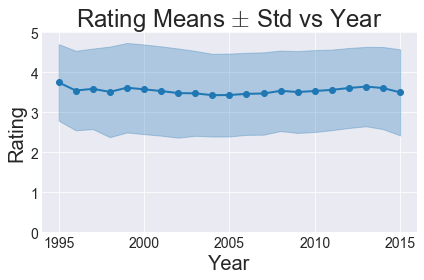

In [9]:
# <!-- collapse=True -->
means_stds_by_year = ratings_df.groupby('year')['rating'].agg(['mean', 'std']).reset_index()
years, means, stds = means_stds_by_year['year'], means_stds_by_year['mean'], means_stds_by_year['std']
l, = plt.plot(years, means, 'o-', label='Mean Rating')
plt.fill_between(years, means-stds, means+stds, alpha=0.3, color=l.get_color())
plt.ylim([0, 5])
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title(r'Rating Means $\pm$ Std vs Year')
plt.tight_layout()
plt.show()

This average ratings were fairly consistent around 3.5. The lack of large changes over time will simplify modeling a little bit.

One last thing I'm curious about (for now) when it comes to changes over time:

# 6. How quickly do the movie and user bases grow over time?

I'll assume that a user has joined on her first rating, and that she remains a user from then on.

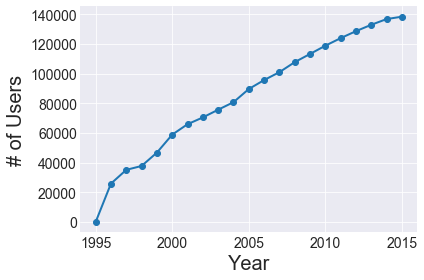

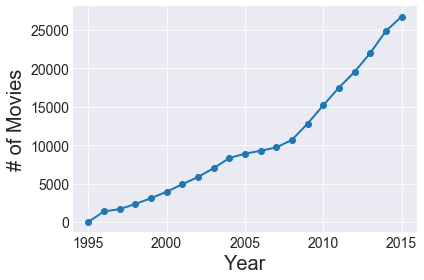

In [10]:
# <!-- collapse=True -->
n_users = []
n_movies = []
years = np.unique(ratings_df['year'])
for year in years:
    n_users.append(ratings_df[ratings_df['year'] <= year]['userId'].nunique())
    n_movies.append(ratings_df[ratings_df['year'] <= year]['movieId'].nunique())
plt.plot(years, n_users, 'o-')
plt.xlabel('Year')
plt.ylabel('# of Users')
plt.tight_layout()
plt.show()
plt.plot(years, n_movies, 'o-')
plt.xlabel('Year')
plt.ylabel('# of Movies')
plt.tight_layout()
plt.show()

New users seen in the dataset look fairly linear over time. I was kind of expecting more variation given the fluctuations in number of ratings per year, but this is good to know. It's interesting that after 2008 there appears to be a sudden increase in the number of movies rated. I'm not sure if there was just a sharp increase in movies produced per year, or if a large fraction of movies were being made available to rate with the MovieLens system, but this might be something to keep in mind.

# 7. How sparse is the user/movies matrix we'll be dealing with?

Sparsity is a very common challenge to overcome in many collaborative filtering applications. By sparsity, I mean that if we create a matrix $R$ with dimensions $n_{users} \times n_{movies}$ where each element $r_{ij}$ is a single rating by user $i$ of movie $j$, this matrix will be very empty because most users have only rated a few of the 25,000+ movies available. Let's see how bad it is.

Here's one way of looking at it: let's sort the ~140,000 users by decreasing number of movies each one rated, and plot the number of movies they rated. We can do the same for the number of users who rated each of the ~25,000 movies:

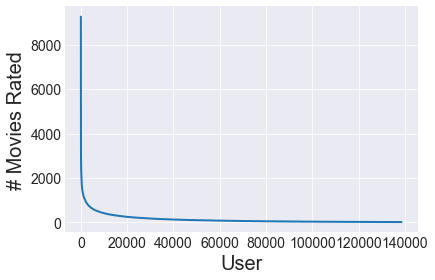

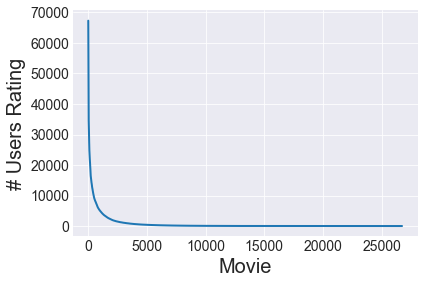

In [11]:
# <!-- collapse=True -->
user_counts = ratings_df['userId'].value_counts()
movie_counts = ratings_df['movieId'].value_counts()
plt.plot(user_counts.values)
plt.xlabel('User')
plt.ylabel('# Movies Rated')
plt.tight_layout()
plt.show()
plt.plot(movie_counts.values)
plt.xlabel('Movie')
plt.ylabel('# Users Rating')
plt.tight_layout()
plt.show()

In [12]:
# <!-- collapse=True -->
highest_num_movies_rated = user_counts.iloc[0]
highest_num_ratings_on_movie = movie_counts.iloc[0]
percent_movies_with_1_rating = 100 * (movie_counts==1).sum()/len(movie_counts)
Markdown("""
You'll see that there are a very small number of highly
active users (one who rated {} movies!), and a few
movies with huge numbers of ratings, the highest of which
is [Pulp Fiction](https://movielens.org/movies/296) coming
in with  a whopping {} ratings in this dataset (90,505
in total as of 3/12/2018)! This quickly drops off to just
a few ratings. Users were only included in this dataset if
they had $\ge$ 20 ratings, so 20 is the minimum that the
user curve drops off to, but there was no such limit for movies.
In fact, about {}% of the movies in this dataset had exactly 1 rating.
""".format(
        highest_num_movies_rated,
        highest_num_ratings_on_movie,
        int(percent_movies_with_1_rating + 0.5),
    )
)


You'll see that there are a very small number of highly
active users (one who rated 9254 movies!), and a few
movies with huge numbers of ratings, the highest of which
is [Pulp Fiction](https://movielens.org/movies/296) coming
in with  a whopping 67310 ratings in this dataset (90,505
in total as of 3/12/2018)! This quickly drops off to just
a few ratings. Users were only included in this dataset if
they had $\ge$ 20 ratings, so 20 is the minimum that the
user curve drops off to, but there was no such limit for movies.
In fact, about 15% of the movies in this dataset had exactly 1 rating.


Another way to visualize these distributions is with probability density functions (PDFs) which are just normalized histograms:

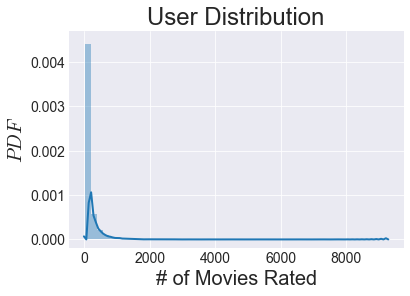

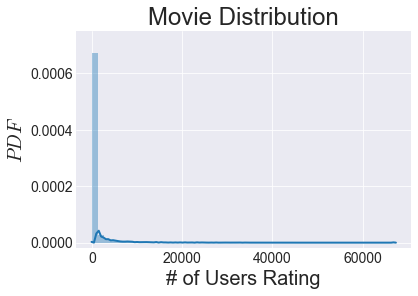

In [13]:
# <!-- collapse=True -->
ax = sns.distplot(user_counts)
ax.set_xlabel('# of Movies Rated')
ax.set_ylabel(r'$PDF$')
ax.set_ylim([-0.0002, 0.0047])
ax.set_title('User Distribution')
plt.show()
ax = sns.distplot(movie_counts)
ax.set_xlabel('# of Users Rating')
ax.set_ylabel(r'$PDF$')
ax.set_ylim([-0.00002, 0.00075])
ax.set_title('Movie Distribution')
plt.show()

With such long-tailed distributions, it helps to take the logarithm of the x-axis to help make sense of if. Often if there's a long tail, doing a log-transform will reveal a normal-ish distribution, suggesting the original distribution is log-normal. Let's see what a $\log_{10}$ transform reveals here:

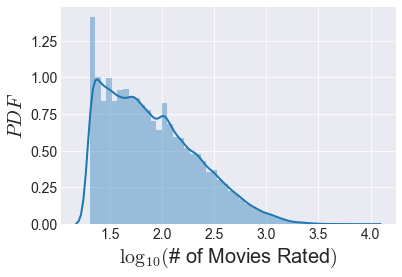

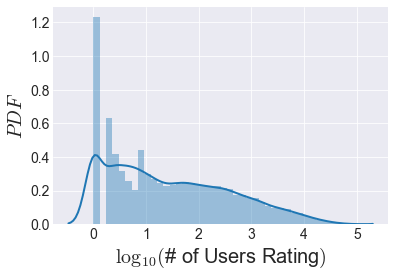

In [14]:
log_user_counts = np.log10(user_counts)
ax = sns.distplot(log_user_counts)
ax.set_xlabel(r'$\log_{10}($# of Movies Rated$)$')
ax.set_ylabel(r'$PDF$')
plt.show()
log_movie_counts = np.log10(movie_counts)
ax = sns.distplot(log_movie_counts)
ax.set_xlabel(r'$\log_{10}($# of Users Rating$)$')
ax.set_ylabel(r'$PDF$')
plt.show()

Even after taking a log-transform, these distributions are quite skewed to the right, so they're not even log-normal distributions.

In [15]:
# <!-- collapse=True -->
num_users = ratings_df['userId'].nunique()
num_movies = ratings_df['movieId'].nunique()
num_ratings_given = len(ratings_df)
user_movies_matrix_density = num_ratings_given / num_users / num_movies
Markdown("""
We have {} users and {} movies, giving a possible total of {} ratings,
but we only have {} ratings, giving a matrix density of only {:7.5f}!
This is a very sparse matrix. This means that of every 1000 possible
user-movie combos that could have happened, only about {} actually did.
""".format(
        num_users, num_movies, num_users * num_movies, num_ratings_given,
        user_movies_matrix_density, int(user_movies_matrix_density*1000)
    )
)


We have 138493 users and 26744 movies, giving a possible total of 3703856792 ratings,
but we only have 20000263 ratings, giving a matrix density of only 0.00540!
This is a very sparse matrix. This means that of every 1000 possible
user-movie combos that could have happened, only about 5 actually did.
